<a href="https://colab.research.google.com/github/Chiragkgit/Pytorch-Testing-V1/blob/main/Pytorch_FIrst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [78]:
#Creating a model class that inherits NN module

class Model(nn.Module):
  # Input Layer (4 Features of the flower) ->
  #Hidden Layer 1(Neuron Layer) - ->
  #H2(Neurons)) --> H3( Types of Flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [79]:
#Manual seed picking for randomisation
torch.manual_seed(41)
#creating an instance of model

model = Model()

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [82]:
#Changing last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0	)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [83]:
#Train Test and Split


X = my_df.drop('variety', axis = 1)
y = my_df['variety']


In [84]:
#Converting to Numpy arrays

X = X.values
y = y.values

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 41)

In [86]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [87]:
#Setting the criteria to measure the error

criterion = nn.CrossEntropyLoss()

#Choosing an optimiser Adam, learning rate = decrease if no change in error

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)





In [88]:
#Training the model, epochs = 100


epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch {i} and loss {loss}')


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss 1.125203251838684
Epoch 10 and loss 1.0097211599349976
Epoch 20 and loss 0.8162348866462708
Epoch 30 and loss 0.585993230342865
Epoch 40 and loss 0.4003390073776245
Epoch 50 and loss 0.2679471969604492
Epoch 60 and loss 0.1796349734067917
Epoch 70 and loss 0.12165623158216476
Epoch 80 and loss 0.0860651433467865
Epoch 90 and loss 0.06522615998983383


Text(0.5, 0, 'epoch')

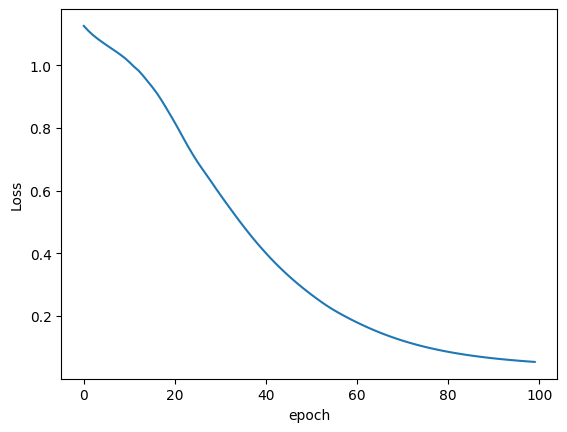

In [89]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [90]:
#Evaluating Test model

with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)
  print(f'Loss {loss}')

Loss 0.1314609795808792
